### Name: Amir Hosein Haji Mohammad rezaie

### Std ID: 99109252

# Gauss-Seidel Method for Solving Linear Systems

The Gauss-Seidel method is an iterative technique for solving a square system of \(n\) linear equations with unknown \(x\):
\[ Ax = b \]

where:
- \(A\) is a known (n*n) matrix,
- \(x\) is the vector of unknowns,
- \(b\) is the known vector.

The method iteratively improves the solution vector until it converges to a sufficiently accurate solution.

## Algorithm

Given a system of linear equations \(Ax = b\), the Gauss-Seidel method updates each component of the solution vector as follows:

1. Initialize the solution vector $x^{(0)}$ (often with zeros).
2. For each iteration \(k = 1, 2, 3, ...):
   - For each \(i = 1, 2, ..., n\):
     $x_i^{(k+1)}$ = $\frac{1}{a_{ii}} (b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij} x_j^{(k)}$
3. Repeat until convergence (e.g., $\|x^{(k+1)} - x^{(k)}\|$ is sufficiently small).

The method converges if the matrix \(A\) is diagonally dominant or positive definite.


## Implementation
Create a code cell with the implementation of the Gauss-Seidel method:

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(A, b, x0, tol=1e-10, max_iterations=100):
    ## TODO
    'implement the gauss_seidel method'
    'A is the coefficient matrix, b is values and x0 is the initial point'
    'tolerance is when we should stop iterating and it means our diffence between x is low'
    'you should also keep x values in every iteration'
    iterations = [x0]
    n = A.shape[0]
    U = np.zeros(A.shape)
    D = np.zeros(A.shape)
    L = np.zeros(A.shape)
    for i in range(n):
        for j in range(n):
            if i == j:
                D[i, j] = A[i, j]
            elif i > j:
                L[i, j] = A[i, j]
            else:
                U[i, j] = A[i, j]


    c = np.linalg.inv(np.identity(n) + np.linalg.inv(D) @ L) @ np.linalg.inv(D) @ b
    T = -np.linalg.inv(np.identity(n) + np.linalg.inv(D) @ L) @ np.linalg.inv(D) @ U

    x_new = x0
    for i in range(max_iterations):
        x_new = T @ x_new + c
        iterations.append(x_new.copy())
        if np.sum((x_new - iterations[-2]) ** 2) <= tol:
            break

    
    return x_new, iterations



Now, implement a function for plotting the convergenes of points and iterations. you should plot iteration against values of x's for the x's that you have saved in each iteration of gauss_seidel function.

In [15]:
# Plotting the convergence
def plot(iterations, n_iterations):
    plt.figure(figsize=(15, 7))
    for i in range(n_iterations):
        plt.plot([iter[i] for iter in iterations], label = f'x_{i + 1}', marker = 'o')
    plt.title('Convergance of gauss-seidel method')
    plt.ylabel('Value')
    plt.xlabel('Iteration')
    plt.grid()
    plt.legend(loc = 'best')

Now test your implemented functions for given equations.

[3.09541645 2.40055515 3.99898938]


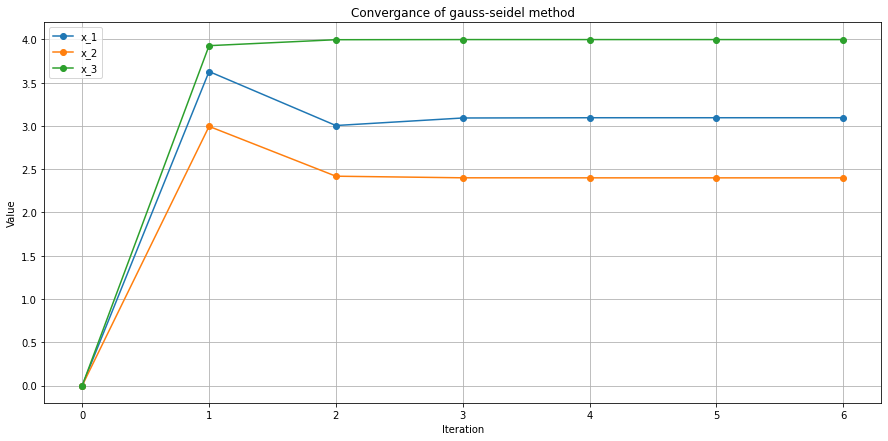

In [31]:
# Example 1:
A = np.array([[5.51, 0.86, 0.22],
              [0.76, 8.86, 1.42],
              [0.03, 0.58, 5.13]], dtype=float)
b = np.array([20, 29.3, 22], dtype=float)
x0 = np.zeros_like(b)

## just input the functions and plot

x_new, iterations = gauss_seidel(A, b, x0)
print(x_new)
plot(iterations, 3)

Solution: [3.0954165  2.40055514 3.99898938]


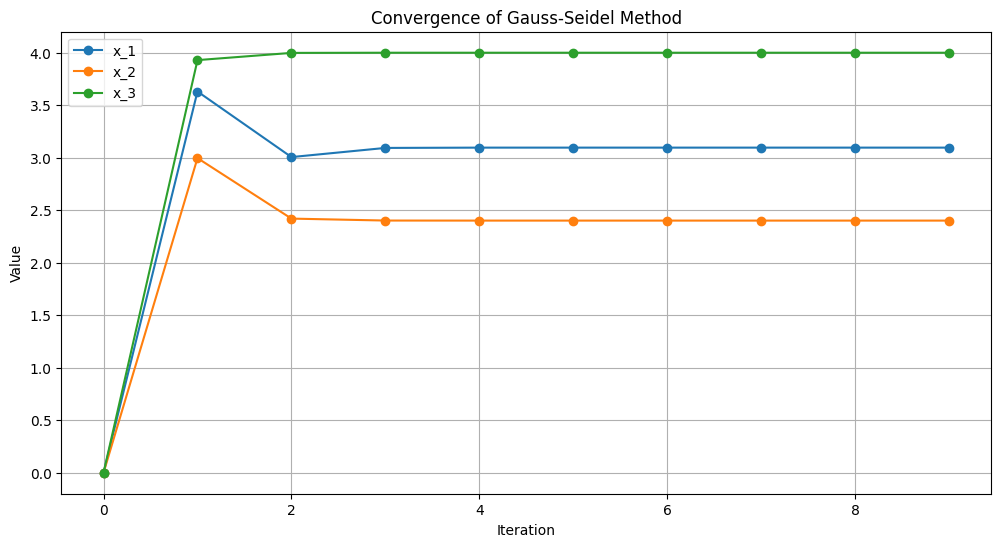

In [8]:
# Example 1:
A = np.array([[5.51, 0.86, 0.22],
              [0.76, 8.86, 1.42],
              [0.03, 0.58, 5.13]], dtype=float)
b = np.array([20, 29.3, 22], dtype=float)
x0 = np.zeros_like(b)

## just input the functions and plot

x_new, iterations = gauss_seidel(A, b, x0)
plot(iterations, 3)

[ 30233090. -60466175.]


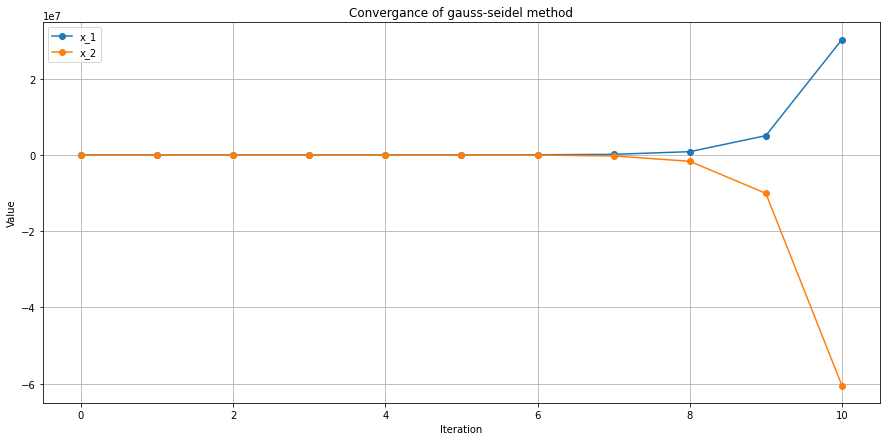

In [36]:
# Example 2:
A = np.array([[1, 3],
              [2, 1]], dtype=float)
b = np.array([5, 5], dtype=float)
x0 = np.zeros_like(b)

x_new, iterations = gauss_seidel(A, b, x0, max_iterations=10)
print(x_new)
plot(iterations, 2)

## Questions :
#### Why in example 2 you cant converge to the solution ?
Your answer : The A matrix is not diagonally dominant. In addition, this matrix isn't positive definite because its eigen values are ? and ?. Therefore, this matrix doesn't satisfy the required conditions for converging the answer of this method.
#### Does gauss siedel always converge to the solution ? On what properties does convergenes of this method depends ?
Your answer : No. Generally, for methods like jacobian and gauss-seidel the general format of answer is $x^{(k + 1)} = Tx^{(k)} + c$. Regarding this formula, the $||T|| < 1$ for convergance of this method. In addition, the matrix A should be positive definite or diagonally dominant in order to satisfy this condition.